# HELLO PETLOVERS
# version1
* I got into this competition just now,and I used the most simple way to do it.
* No Feature Engineering
* No Parameters Tuning
* No EDA
* and I got RMSE 20.8,maybe it's baseline we can use many diffent way to break.

# version2

* use lgbm is better?
* **Um....RMSE 20.5.... a little better...**

# version3
* I add some EDA here.
* Maybe we can find more detail from them?

# version4...
I try to use CNN to predict target

How is it?

https://www.kaggle.com/k589k589/tensorflow-cnn

# Let's solve the problem together!!!

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import missingno as msno
from pathlib import Path
from tqdm import tqdm
import wandb
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
train=pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
test=pd.read_csv('../input/petfinder-pawpularity-score/test.csv')

/kaggle/input/petfinder-pawpularity-score/sample_submission.csv
/kaggle/input/petfinder-pawpularity-score/train.csv
/kaggle/input/petfinder-pawpularity-score/test.csv
/kaggle/input/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg
/kaggle/input/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg
/kaggle/input/petfinder-pawpularity-score/test/43a2262d7738e3d420d453815151079e.jpg
/kaggle/input/petfinder-pawpularity-score/test/8f49844c382931444e68dffbe20228f4.jpg
/kaggle/input/petfinder-pawpularity-score/test/4128bae22183829d2b5fea10effdb0c3.jpg
/kaggle/input/petfinder-pawpularity-score/test/80bc3ccafcc51b66303c2c263aa38486.jpg
/kaggle/input/petfinder-pawpularity-score/test/e0de453c1bffc20c22b072b34b54e50f.jpg
/kaggle/input/petfinder-pawpularity-score/test/b03f7041962238a7c9d6537e22f9b017.jpg
/kaggle/input/petfinder-pawpularity-score/train/7954ebb5c90d9618e34959df0ad5f062.jpg
/kaggle/input/petfinder-pawpularity-score/train/2969162fab1d0e5a65e4ce02db26

# **Exploratory Data Analysis**

<AxesSubplot:>

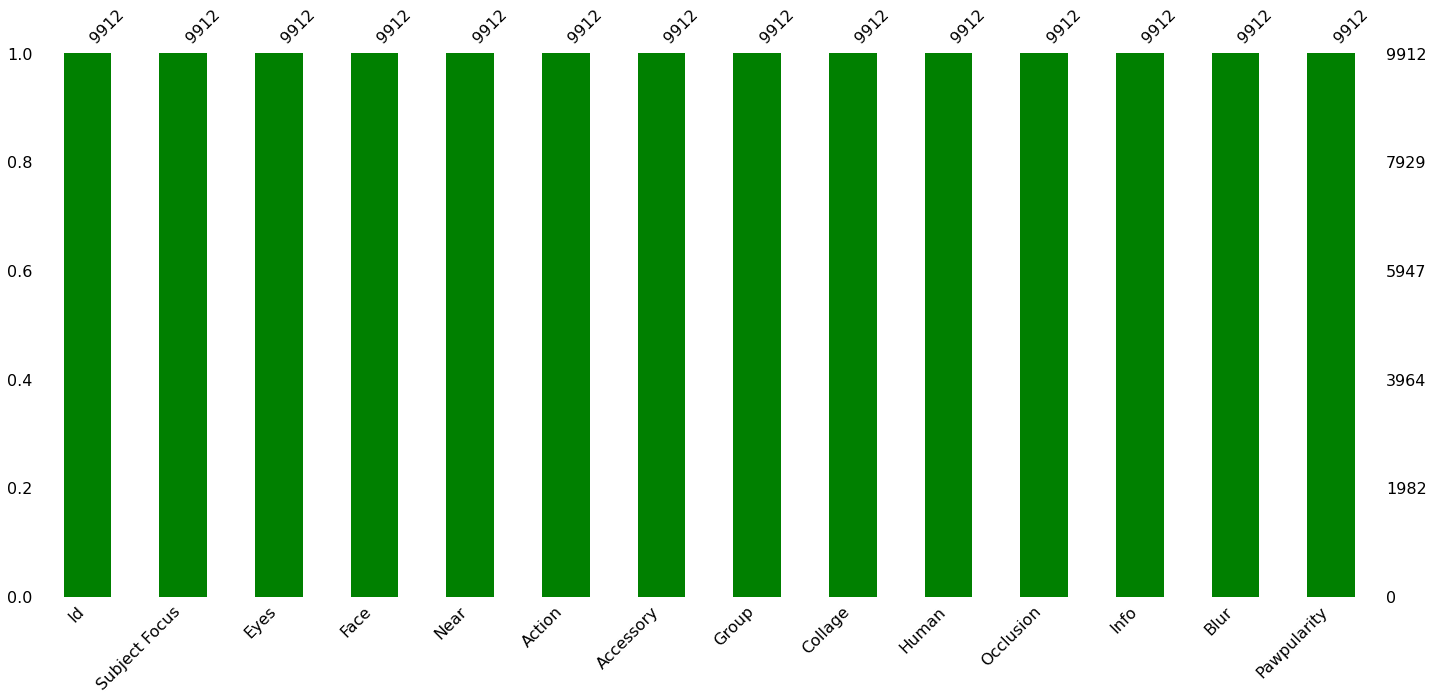

In [2]:
msno.bar(train,color='green')

<AxesSubplot:>

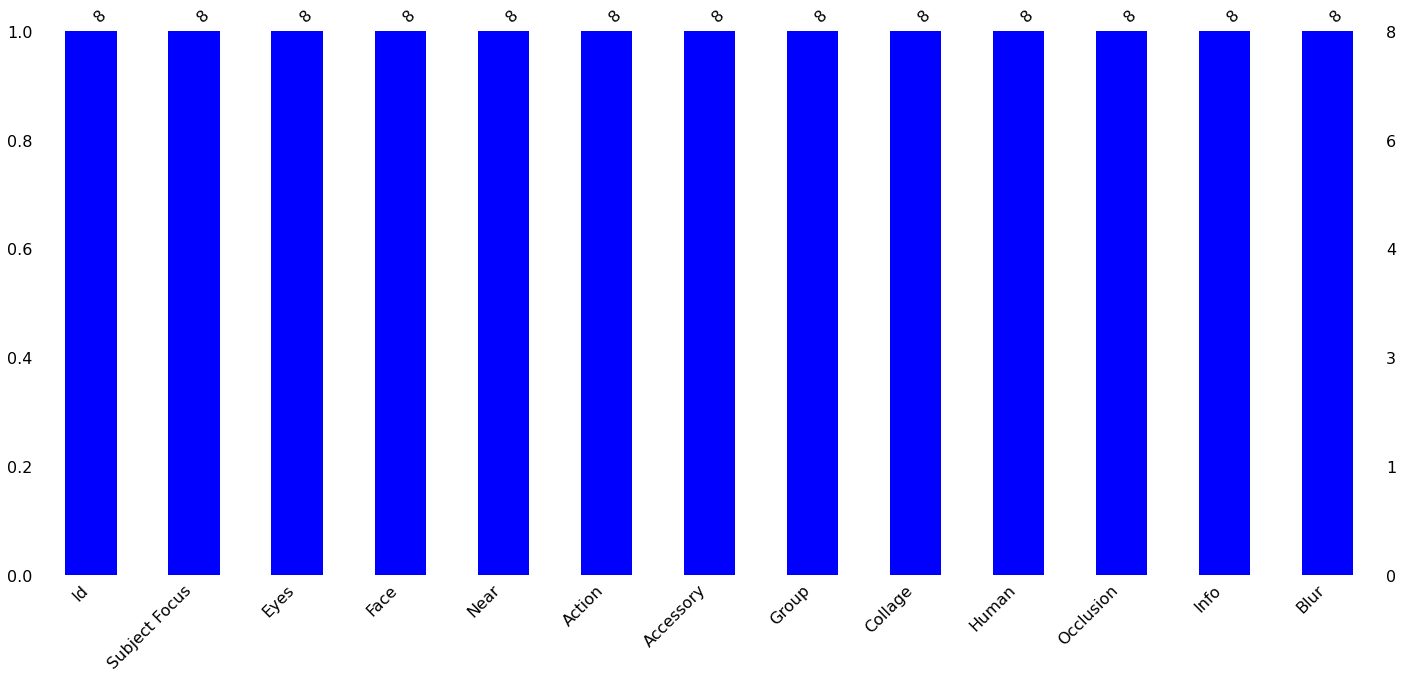

In [3]:
msno.bar(test,color='blue')

<AxesSubplot:title={'center':'Pawpularity Score'}, xlabel='Pawpularity', ylabel='Count'>

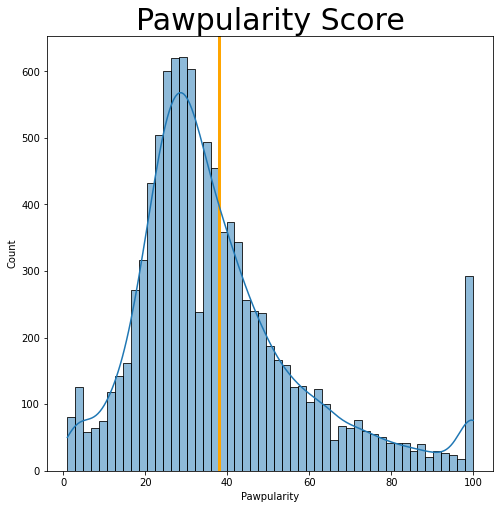

In [4]:
plt.figure(figsize=(8,8))
plt.title('Pawpularity Score',fontsize=30)
plt.axvline(train['Pawpularity'].mean(), c='orange', ls='-', lw=3)
sns.histplot(train['Pawpularity'],kde=True)

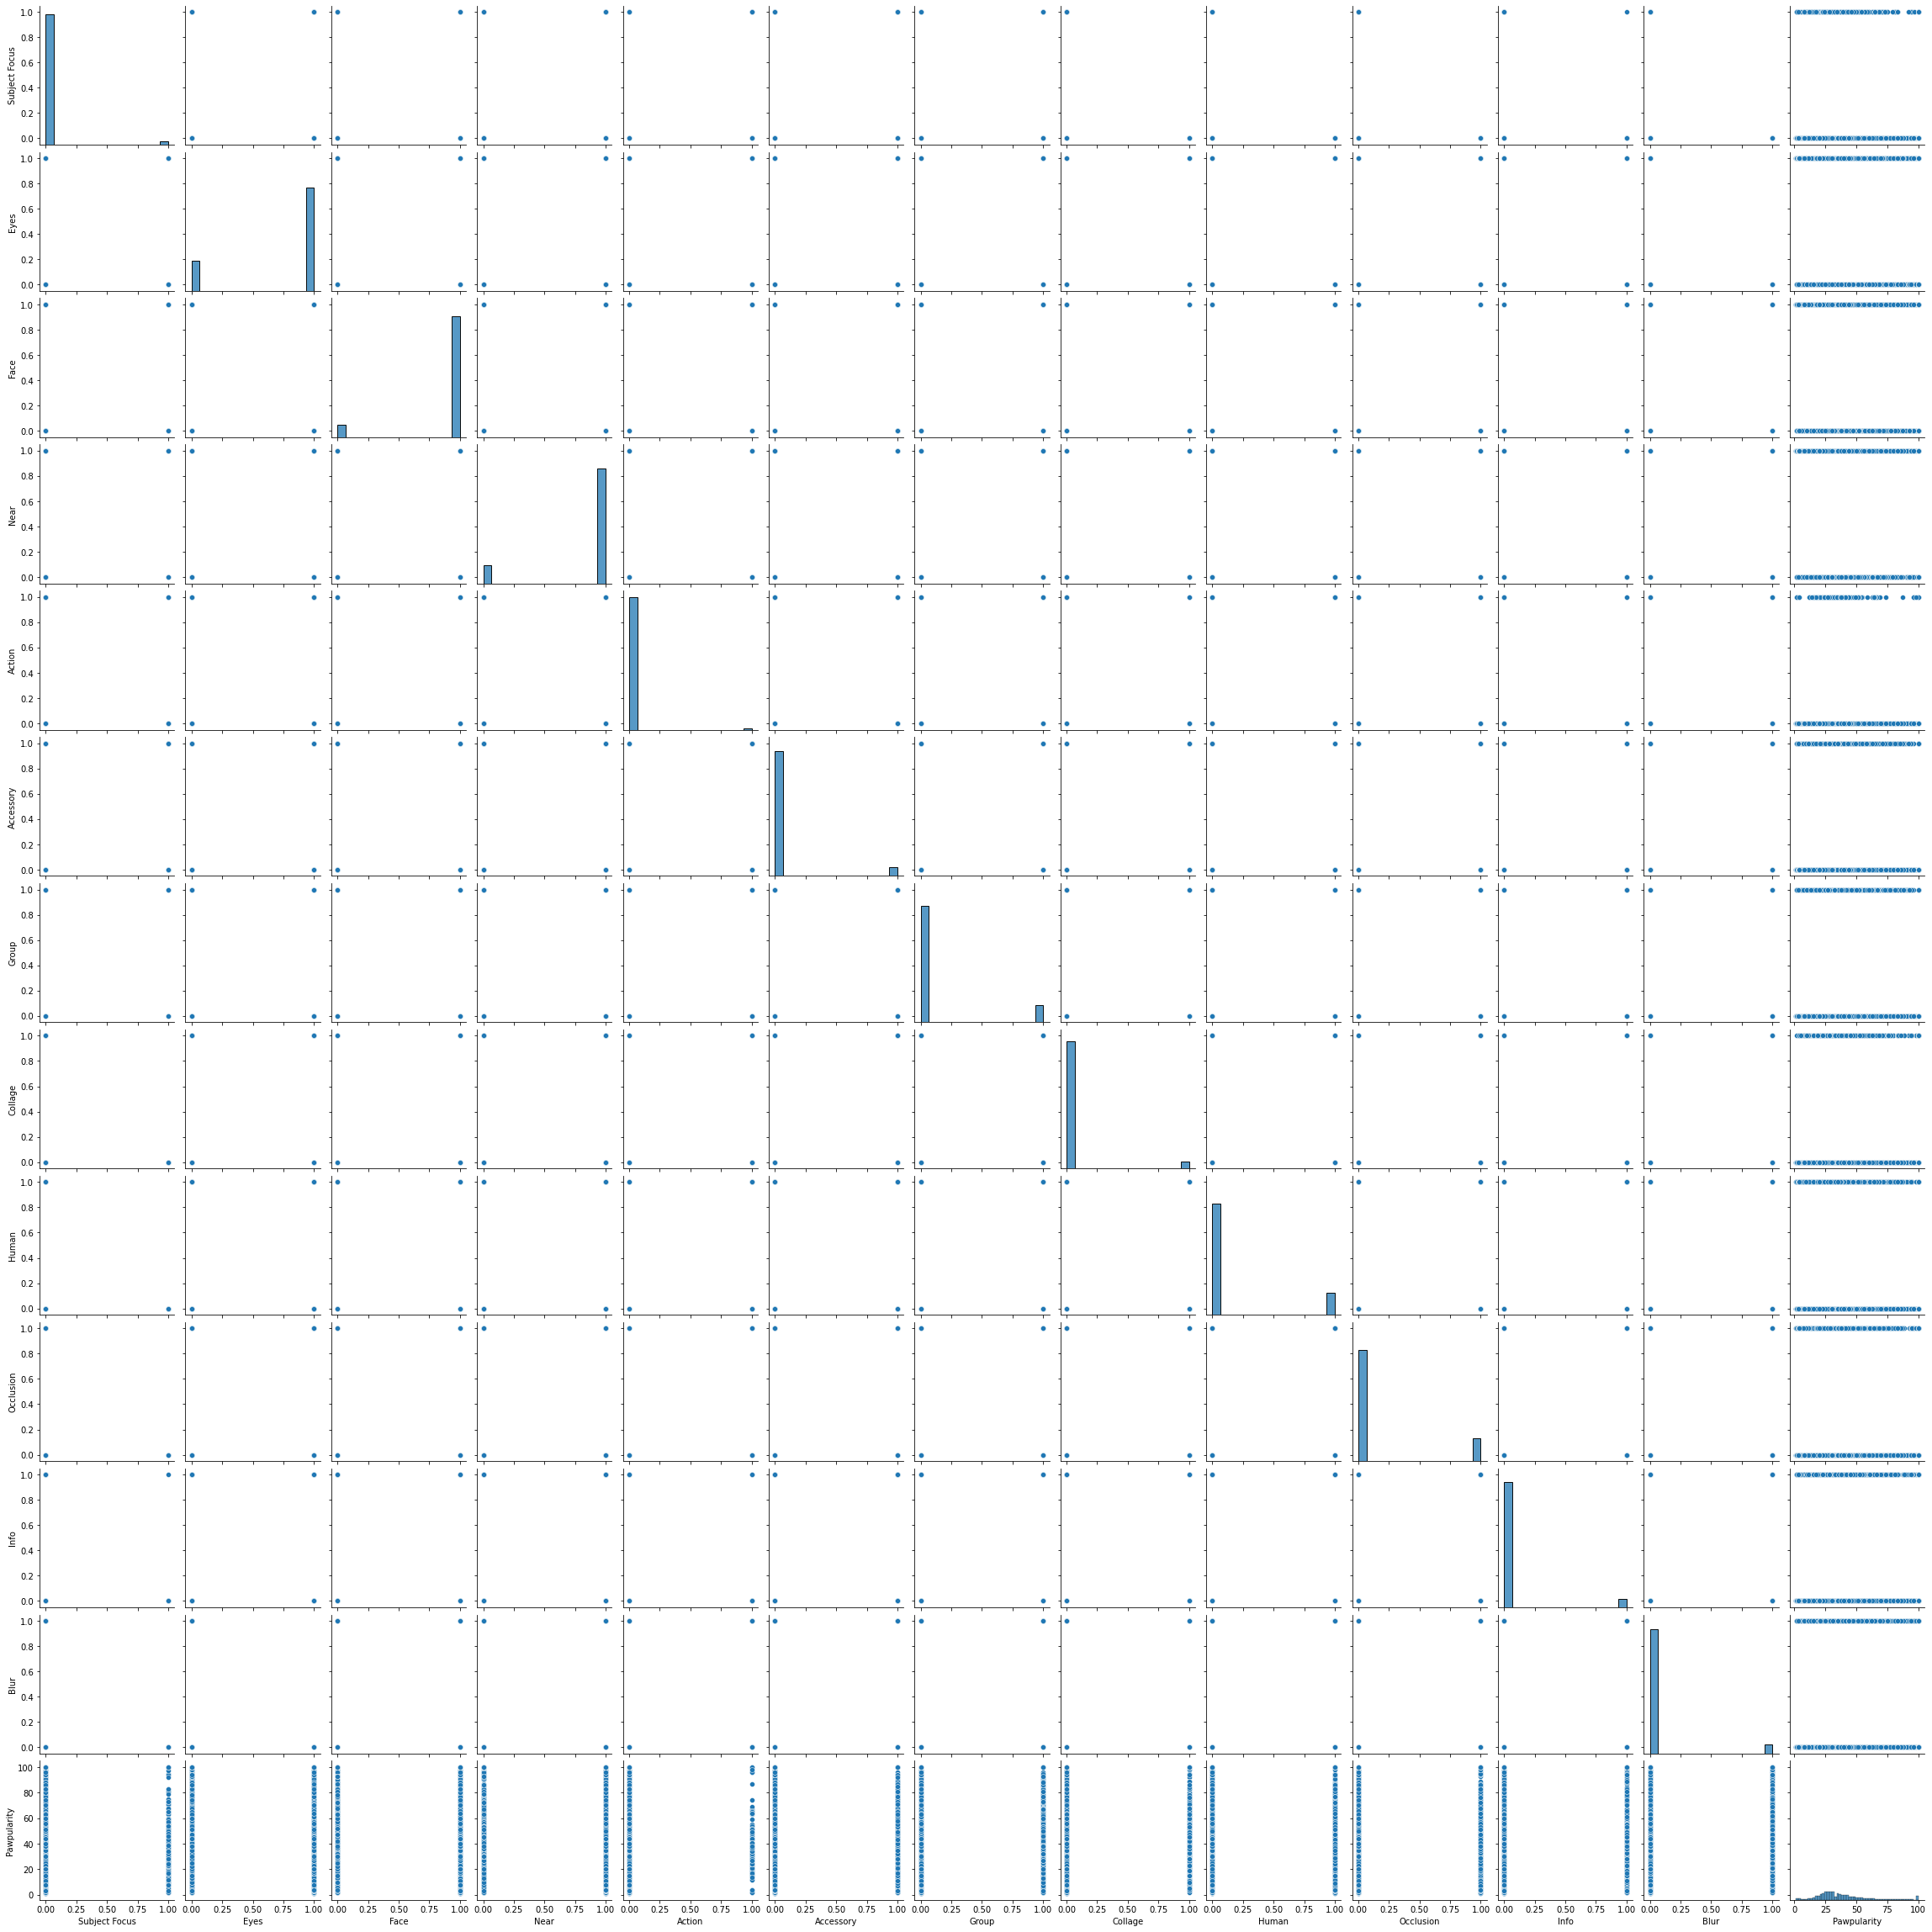

In [5]:
sns.pairplot(data=train)

<AxesSubplot:title={'center':'Matrix of relation'}>

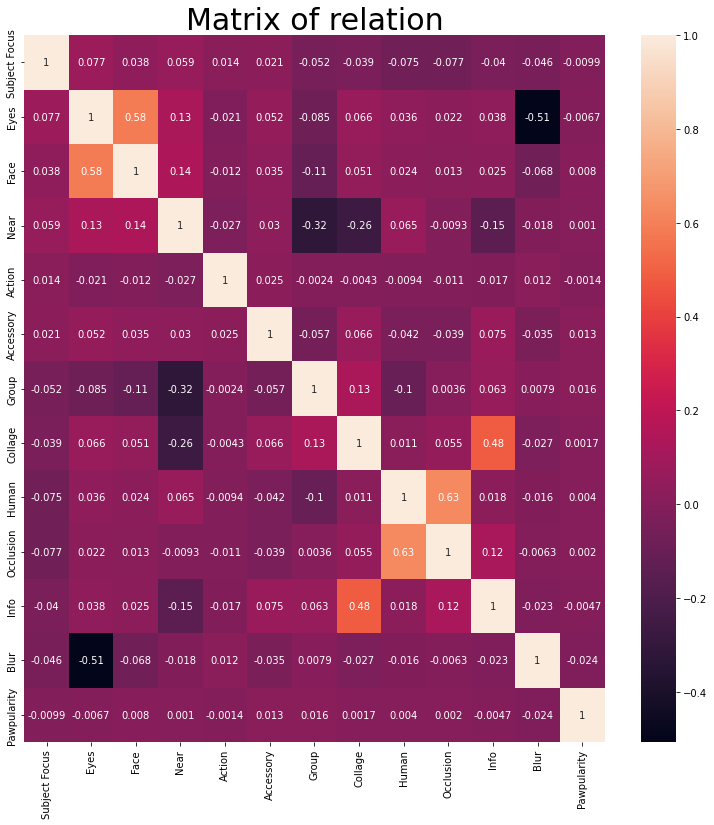

In [6]:
plt.figure(figsize=(13,13))
plt.title('Matrix of relation',fontsize=30)
sns.heatmap(train.corr(),annot=True)

# Meta Features Inference
* NO missing values
* Pawpularity Score is normal distribution.
* There seems to be less correlation between features
* Between target and features,the all correlation coefficients are less than 0.03.....

# **PHOTOS**

In [7]:
def plot_pic(target_df):
    plt.figure(figsize=(20, 50))
    
    n_rows = min(60, target_df.shape[0])
    
    for i in range(n_rows):
        row = target_df.iloc[i]
        img_path = f"../input/petfinder-pawpularity-score/train/{row['Id']}.jpg"
        Pawpularity = row["Pawpularity"]
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        plt.subplot(12, 5, i+1)
        plt.title(f"Pawpularity: {Pawpularity}")
        plt.imshow(img)
    plt.tight_layout()
    plt.show()
    plt.close()

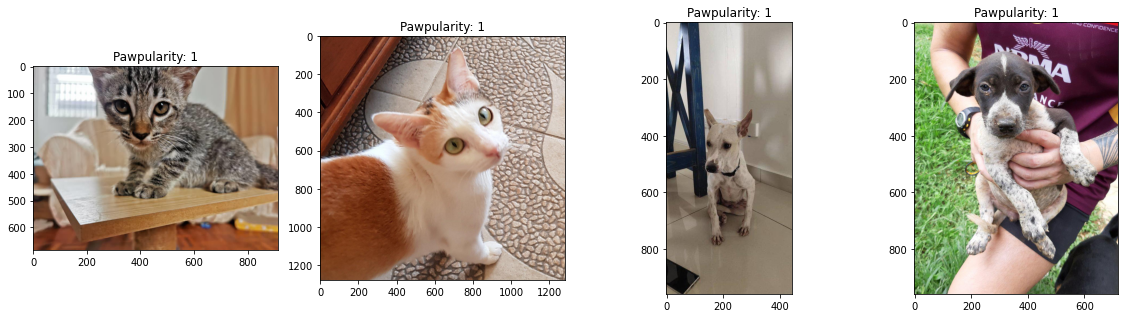

In [8]:
plot_pic(train[train['Pawpularity']==1])

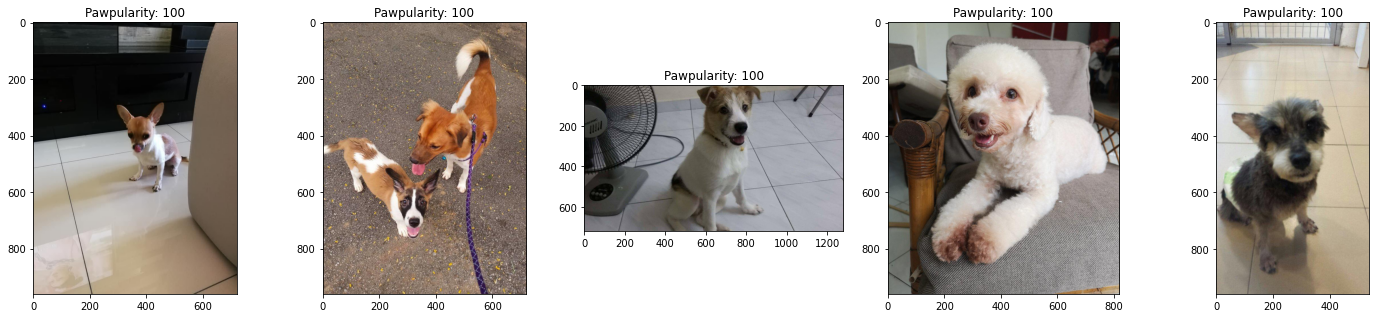

In [9]:
plot_pic(train[train['Pawpularity']==100].iloc[:5])

# **To me,they are SAME cute!!!!!**

* Um.....maybe we can use machine learning or deep learning to solve this problem?

# **LightGBM**

In [10]:
cols=['Id','Pawpularity']
x_train=train.drop(cols,axis=1)

In [11]:
y_train=train['Pawpularity']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [13]:
import lightgbm as lgb

In [14]:
lgbr=lgb.LGBMRegressor(max_depth=10,learning_rate=0.005,n_estimators=200,reg_alpha=1,reg_lambda=0.1)
lgbr.fit(x_train,y_train)
y_pred=lgbr.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error,r2_score
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
print(rmse(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

20.131934604846062
405.2947909337983
0.002829216351175501


In [16]:
test1=test.drop('Id',axis=1)
Pred=lgbr.predict(test1)

In [17]:
sub=pd.DataFrame()
sub['Id']=test['Id']
sub['Pawpularity']=Pred

In [18]:
sub.to_csv('submission.csv',index=False)